## Spam Detection System

### Importing Necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
data = pd.read_csv('spam.csv',encoding='latin-1')

### Looking inside data

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Now dropping the unnamed label

In [4]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

### We can see that out of 5571 data 4825 are ham and 747 are spam

### Lets add new feature Length of message  to check its connection with spam

In [ ]:
data['length'] = data['v2'].apply(len)

In [ ]:
data.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


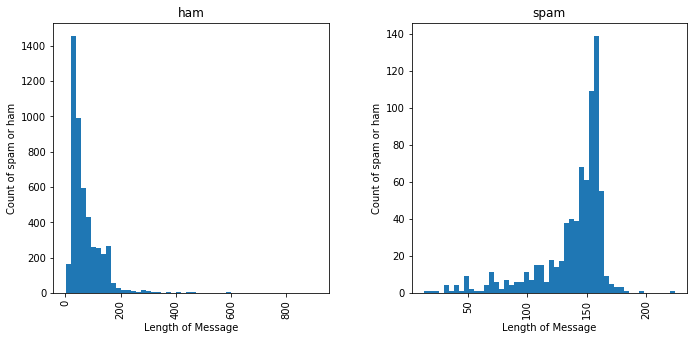

In [ ]:
axarr = data.hist(column='length', by='v1', bins=50,figsize=(11,5))
# ax.set(xlabel="Length of Message", ylabel="Count of spam or ham")
for ax in axarr.flatten():
    ax.set_xlabel("Length of Message")
    ax.set_ylabel("Count of spam or ham")

### Looks like the lengthy is the message, more likely it is a spam

### Data Pre-Processing

In [ ]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Creating new dataset to copy on later

In [ ]:
text_proc = data['v2'].copy()

In [ ]:
text_proc.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

### Lets remove any punctuation and stopwords.

In [ ]:
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [ ]:
text_proc = text_proc.apply(text_process)

In [ ]:
%%time
vectorizer = CountVectorizer("english")
features = vectorizer.fit_transform(text_proc)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Classification and Prediction with  Naive Bayes   using Count Vectorizer only

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, data['v1'], test_size=0.33, random_state=111)

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)
Y_predict = MNB.predict(X_test)
print('Accuracy of model is :')
print(accuracy_score(Y_predict,Y_test))

In [ ]:
plot_confusion_matrix(confusion_matrix(Y_predict,Y_test), classes=['Labels','Message'], normalize=False, title='Confusion matrix', cmap=plt.cm.BrBG)

### Classification and Prediction with  Naive Bayes   using TF-IDF  only

In [ ]:
text_proc = text_proc.apply(text_process)

In [ ]:
%%time
vectorizer_tdf = TfidfVectorizer("english")
features = vectorizer_tdf.fit_transform(text_proc)

In [ ]:
NB = MultinomialNB()
MNB.fit(X_train,Y_train)
Y_predict = MNB.predict(X_test)
print('Accuracy of model is :')
print(accuracy_score(Y_predict,Y_test))

In [ ]:
plot_confusion_matrix(confusion_matrix(Y_predict,Y_test), classes=['Labels','Message'], normalize=False, title='Confusion matrix', cmap=plt.cm.BrBG)